In [16]:
!pip install pyspedas


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


# Example of FAC-Xgse matrix generation and rotation

In [17]:
from pytplot import timespan
timespan('2007-03-23', 1, keyword='days')

In [18]:
from pyspedas import themis
themis.state(probe='c')
themis.fgm(probe='c', coord='dsl', level='l2')

03-Feb-25 10:47:02: File is current: themis_data/thc/l1/state/2007/thc_l1_state_20070323.cdf
03-Feb-25 10:47:02: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thc/l2/fgm/2007/
03-Feb-25 10:47:02: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf


['thc_fgs_btotal',
 'thc_fgs_dsl',
 'thc_fgl_btotal',
 'thc_fgl_dsl',
 'thc_fgh_btotal',
 'thc_fgh_dsl',
 'thc_fge_btotal',
 'thc_fge_dsl']

In [19]:
from pytplot import tsmooth
tsmooth('thc_fgs_dsl', 601, newname='thc_fgs_dsl_sm601')

03-Feb-25 10:47:31: tsmooth was applied to: thc_fgs_dsl_sm601


['thc_fgs_dsl_sm601']

In [20]:
from pyspedas import fac_matrix_make
fac_matrix_make('thc_fgs_dsl_sm601', other_dim='Xgse', newname='thc_fgs_dsl_sm601_fac_mat')

'thc_fgs_dsl_sm601_fac_mat'

In [21]:
from pyspedas import tvector_rotate
tvector_rotate('thc_fgs_dsl_sm601_fac_mat', 'thc_fgs_dsl', newname='thc_fgs_facx')

['thc_fgs_facx']

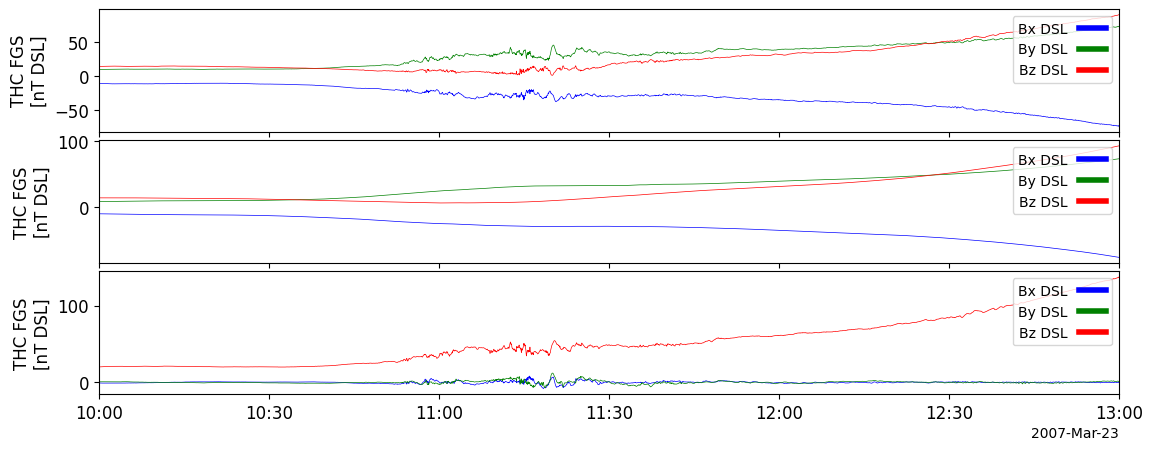

In [22]:
from pytplot import tplot, tlimit
tlimit(['2007-03-23/10:00:00','2007-03-23/13:00:00'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facx'])